In [1]:
# Adapted from: https://people.duke.edu/~ccc14/sta-663/PyMC2.html

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

np.random.seed(1234)

import pymc
import scipy.stats as stats

 [-----------------100%-----------------] 11000 of 11000 complete in 1.2 sec

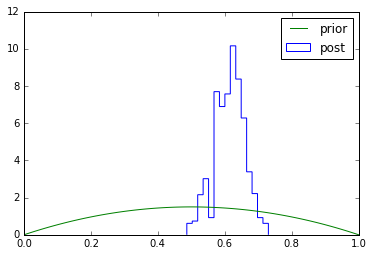

In [2]:
# Coin toss experiment
n = 100
h = 61
alpha = 2
beta = 2

p = pymc.Beta('p', alpha=alpha, beta=beta)
y = pymc.Binomial('y', n=n, p=p, value=h, observed=True)
m = pymc.Model([p, y])
mc = pymc.MCMC(m, )
mc.sample(iter=11000, burn=10000)
plt.hist(p.trace(), 15, histtype='step', normed=True, label='post');
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, alpha, beta), label='prior');
plt.legend(loc='best');

 [-----------------100%-----------------] 11000 of 11000 complete in 4.3 sec

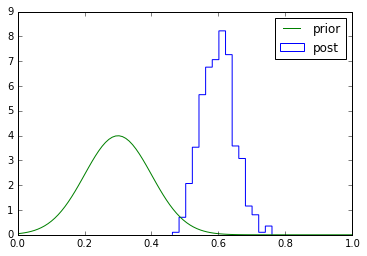

In [3]:
p = pymc.TruncatedNormal('p', mu=0.3, tau=10, a=0, b=1)
y = pymc.Binomial('y', n=n, p=p, value=h, observed=True)
m = pymc.Model([p, y])
mc = pymc.MCMC(m)
mc.sample(iter=11000, burn=10000)
plt.hist(p.trace(), 15, histtype='step', normed=True, label='post');
a, b = plt.xlim()
x = np.linspace(0, 1, 100)
a, b = (0 - 0.3) / 0.1, (1 - 0.3) / 0.1
plt.plot(x, stats.truncnorm.pdf(x, a, b, 0.3, 0.1), label='prior');
plt.legend(loc='best');

 [-----------------100%-----------------] 11000 of 11000 complete in 2.2 sec

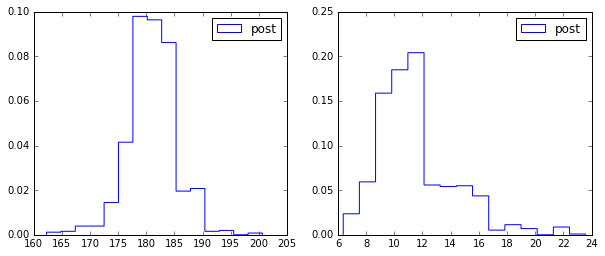

In [4]:
# generate observed data
#N = 100
#y = np.random.normal(10, 2, N)

y = [197,158,185,180,184,178]

# define priors
mu = pymc.Uniform('mu', lower=0, upper=250)
tau = pymc.Uniform('tau', lower=0, upper=1)

# define likelihood
y_obs = pymc.Normal('Y_obs', mu=mu, tau=tau, value=y, observed=True)

# inference
m = pymc.Model([mu, tau, y_obs])
mc = pymc.MCMC(m)
mc.sample(iter=11000, burn=10000)

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.hist(mu.trace(), 15, histtype='step', normed=True, label='post');
plt.legend(loc='best');
plt.subplot(122)
plt.hist(np.sqrt(1.0/tau.trace()), 15, histtype='step', normed=True, label='post');
plt.legend(loc='best');

C:\Users\ben\Anaconda2\lib\site-packages\matplotlib\legend.py:325: UserWarning: Unrecognized location "cost". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  six.iterkeys(self.codes))))


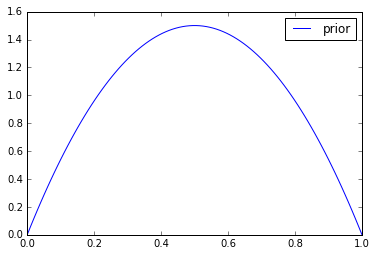

In [5]:
alpha = 2
beta = 2

p = pymc.Beta('p', alpha=alpha, beta=beta)
plt.plot(x, stats.beta.pdf(x, alpha, beta), label='prior');
plt.legend(loc='cost');

 [-----------------100%-----------------] 11000 of 11000 complete in 7.4 sec

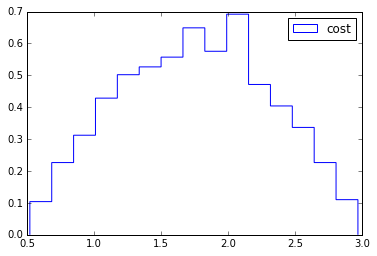

In [6]:
alpha = 2
beta = 2

p = pymc.Beta('p', alpha=alpha, beta=beta)

# Make sure to tell computer that function is pymc deterministic otherwise will not work
@pymc.deterministic
def cost(p=p):
    return p*2.5 + .5

m = pymc.Model([p, cost])
mc = pymc.MCMC(m, )
mc.sample(iter=11000, burn=10000)
plt.hist(cost.trace(), 15, histtype='step', normed=True, label='cost')
x = np.linspace(0, 1, 100)
plt.legend(loc='best');